miRNA Seed Region Feature Engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/mature_human_miRNAs_features.csv')
df.head()

,header,sequence,mature_name,accession,length,A,C,G,U,GC_content
0,>hsa-let-7a-5p MIMAT0000062 Homo sapiens let-7...,UGAGGUAGUAGGUUGUAUAGUU,hsa-let-7a-5p,MIMAT0000062,22,5,0,8,9,0.363636
1,>hsa-let-7a-3p MIMAT0004481 Homo sapiens let-7...,CUAUACAAUCUACUGUCUUUC,hsa-let-7a-3p,MIMAT0004481,21,5,6,1,9,0.333333
2,>hsa-let-7a-2-3p MIMAT0010195 Homo sapiens let...,CUGUACAGCCUCCUAGCUUUCC,hsa-let-7a-2-3p,MIMAT0010195,22,3,9,3,7,0.545455
3,>hsa-let-7b-5p MIMAT0000063 Homo sapiens let-7...,UGAGGUAGUAGGUUGUGUGGUU,hsa-let-7b-5p,MIMAT0000063,22,3,0,10,9,0.454545
4,>hsa-let-7b-3p MIMAT0004482 Homo sapiens let-7...,CUAUACAACCUACUGCCUUCCC,hsa-let-7b-3p,MIMAT0004482,22,5,10,1,6,0.500000


In [3]:
# Working with seed sequence, so let us define it 

df['seed'] = df['sequence'].str.slice(1,8)
df['seed'].head()

0    GAGGUAG
1    UAUACAA
2    UGUACAG
3    GAGGUAG
4    UAUACAA
Name: seed, dtype: object

In [4]:
# Validate length - should be 7 nt for all 2656 miRNAs

df['seed'].str.len().value_counts()

seed
7    2656
Name: count, dtype: int64

In [5]:
df[['mature_name', 'sequence', 'seed']].head(10)

,mature_name,sequence,seed
0,hsa-let-7a-5p,UGAGGUAGUAGGUUGUAUAGUU,GAGGUAG
1,hsa-let-7a-3p,CUAUACAAUCUACUGUCUUUC,UAUACAA
2,hsa-let-7a-2-3p,CUGUACAGCCUCCUAGCUUUCC,UGUACAG
3,hsa-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,GAGGUAG
4,hsa-let-7b-3p,CUAUACAACCUACUGCCUUCCC,UAUACAA
5,hsa-let-7c-5p,UGAGGUAGUAGGUUGUAUGGUU,GAGGUAG
6,hsa-let-7c-3p,CUGUACAACCUUCUAGCUUUCC,UGUACAA
7,hsa-let-7d-5p,AGAGGUAGUAGGUUGCAUAGUU,GAGGUAG
8,hsa-let-7d-3p,CUAUACGACCUGCUGCCUUUCU,UAUACGA
9,hsa-let-7e-5p,UGAGGUAGGAGGUUGUAUAGUU,GAGGUAG


In [6]:
# Seed nuclotide composition

df['seed_A'] = df['seed'].str.count('A')
df['seed_C'] = df['seed'].str.count('C')
df['seed_G'] = df['seed'].str.count('G')
df['seed_U'] = df['seed'].str.count('U')

(df["seed_A"] + df["seed_C"] + df["seed_G"] + df["seed_U"] == 7).all()


np.True_

In [7]:
# Seed GC content

df['seed_GC_content'] = (df['seed_C']+df['seed_G']) / df['seed'].str.len()
df['seed_GC_content'].describe()

count    2656.000000
mean        0.538404
std         0.193838
min         0.000000
25%         0.428571
50%         0.571429
75%         0.714286
max         1.000000
Name: seed_GC_content, dtype: float64

In [8]:
# how many unique seeds do we have?

df['seed'].nunique()

2094

In [9]:
# Most common seed sequence 

df['seed'].value_counts().head(10)

seed
AAAGUAA    23
AAGUGCU    12
GAGGUAG    11
UCUAGAG    10
CUGGACU     9
AAAGUGC     8
AGUGCAA     7
UGGGAGG     7
AGCAGCA     7
AAAAACU     7
Name: count, dtype: int64

We have now grouped seeds after sequence indentity. These groups are from hereon called seed-sharing miRNAs. They have a seed group size

In [10]:
# Add seed-sharing group group size

df['seed_group_size'] = df['seed'].map(df['seed'].value_counts())
df[['mature_name', 'seed', 'seed_group_size']]

,mature_name,seed,seed_group_size
0,hsa-let-7a-5p,GAGGUAG,11
1,hsa-let-7a-3p,UAUACAA,4
2,hsa-let-7a-2-3p,UGUACAG,2
3,hsa-let-7b-5p,GAGGUAG,11
4,hsa-let-7b-3p,UAUACAA,4
...,...,...,...
2651,hsa-miR-12131,UUGGAGA,1
2652,hsa-miR-12132,AUUACUG,1
2653,hsa-miR-12133,UUGGCAC,3
2654,hsa-miR-12135,AAAGGUU,1


In [11]:
# quick inspection of grouping

df.sort_values('seed_group_size', ascending = False)[['mature_name', 'seed', 'seed_group_size']].head(10)

,mature_name,seed,seed_group_size
1502,hsa-miR-548ak,AAAGUAA,23
1394,hsa-miR-548y,AAAGUAA,23
1905,hsa-miR-548ap-5p,AAAGUAA,23
1949,hsa-miR-548aq-5p,AAAGUAA,23
950,hsa-miR-548h-5p,AAAGUAA,23
1144,hsa-miR-548w,AAAGUAA,23
891,hsa-miR-548j-5p,AAAGUAA,23
1567,hsa-miR-548am-5p,AAAGUAA,23
573,hsa-miR-559,AAAGUAA,23
1951,hsa-miR-548ar-5p,AAAGUAA,23


<Axes: xlabel='seed_group_size'>

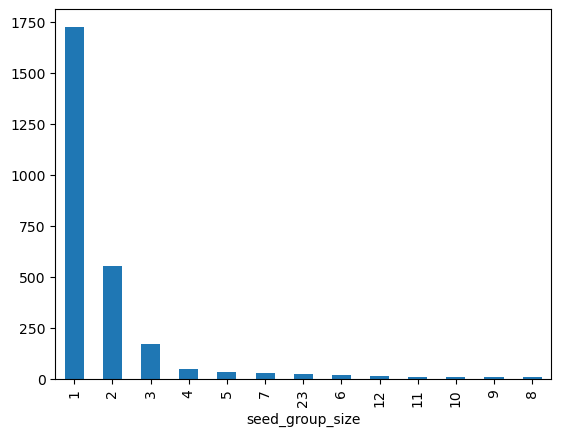

In [12]:
# Quick look at distribution

# Bar chart

df['seed_group_size'].value_counts().head(20).plot(kind='bar')

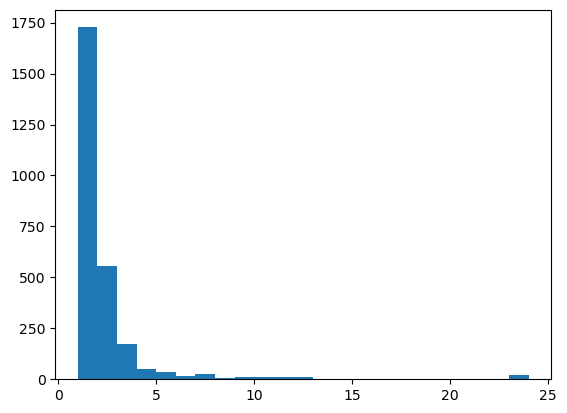

In [13]:
# Histogram

plt.hist(df['seed_group_size'], bins=range(1, df["seed_group_size"].max() + 2))
plt.show()

Most miRNAs belong to small seed-sharing groups, while a limited number of seeds are shared by many miRNAs, consistent with known miRNA family structure.

In [14]:
df.to_csv('../data/human_mature_miRNAs_features.csv', index = False)